Read data file using pandas

In [1]:
# import library cell
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data = pd.read_csv("netflix_titles.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [5]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# Fill missing categorical values with mode (most frequent value)
for col in ['director', 'cast', 'country', 'rating', 'duration']:
    data[col] = data[col].fillna(data[col].mode()[0])

# Fill missing values in 'date_added' with its mode (most frequent value)
data['date_added'] = data['date_added'].fillna(data['date_added'].mode()[0])

# check missing values
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
distinct_countries = set(
    country.strip() for countries in data['country'].dropna().unique() for country in countries.split(',')
)

# Convert to a sorted list and display
distinct_countries = sorted(distinct_countries)
print(len(distinct_countries))

123


In [8]:
# Split director names by ',' and flatten the list
distinct_directors = set(
    director.strip() for directors in data['director'].unique() for director in directors.split(',')
)

# Convert to a sorted list and display
distinct_directors = sorted(distinct_directors)
print(distinct_directors)
len(distinct_directors)


['A. L. Vijay', 'A. Raajdheep', 'A. Salaam', 'A.R. Murugadoss', 'Aadish Keluskar', 'Aamir Bashir', 'Aamir Khan', 'Aanand Rai', 'Aaron Burns', 'Aaron Hancox', 'Aaron Hann', 'Aaron Lieber', 'Aaron Moorhead', 'Aaron Nee', 'Aaron Sorkin', 'Aaron Woodley', 'Aaron Woolf', 'Aatmaram Dharne', 'Abba T. Makama', 'Abbas Alibhai Burmawalla', 'Abbas Mustan', 'Abbas Tyrewala', 'Abby Epstein', 'Abdellatif Kechiche', 'Abdul Aziz Hashad', 'Abdulaziz Alshlahei', 'Abdullah Al Noor', 'Abel Ferrara', 'Abhay Chopra', 'Abhijeet Deshpande', 'Abhijit Kokate', 'Abhijit Panse', 'Abhinav Shiv Tiwari', 'Abhinay Deo', 'Abhishek Chaubey', 'Abhishek Kapoor', 'Abhishek Saxena', 'Abhishek Sharma', 'Abhishek Varman', 'Abir Sengupta', 'Abosi Ogba', 'Abu Bakr Shawky', 'Achille Brice', 'Aco Tenriyagelli', 'Adam Alleca', 'Adam B. Stein', 'Adam Bhala Lough', 'Adam Bolt', 'Adam Carolla', 'Adam Collins', 'Adam Darke', 'Adam Davis', 'Adam Del Giudice', 'Adam Deyoe', 'Adam Dubin', 'Adam Egypt Mortimer', 'Adam Larson Broder', 'Ad

4993

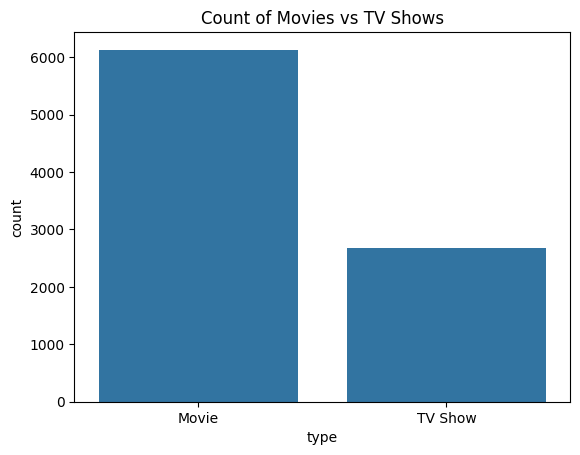

In [9]:
sns.countplot(x='type', data=data)
plt.title('Count of Movies vs TV Shows')
plt.show()


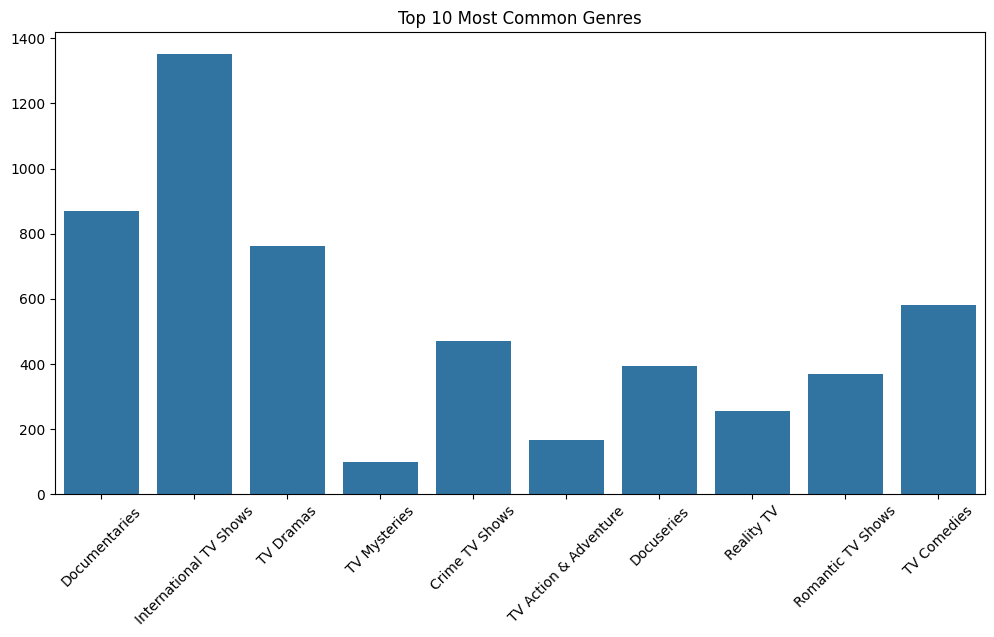

In [10]:


genres = [genre.strip() for sublist in data['listed_in'].dropna().str.split(',') for genre in sublist]
genre_counts = Counter(genres)

plt.figure(figsize=(12,6))
sns.barplot(x=list(genre_counts.keys())[:10], y=list(genre_counts.values())[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Most Common Genres")
plt.show()



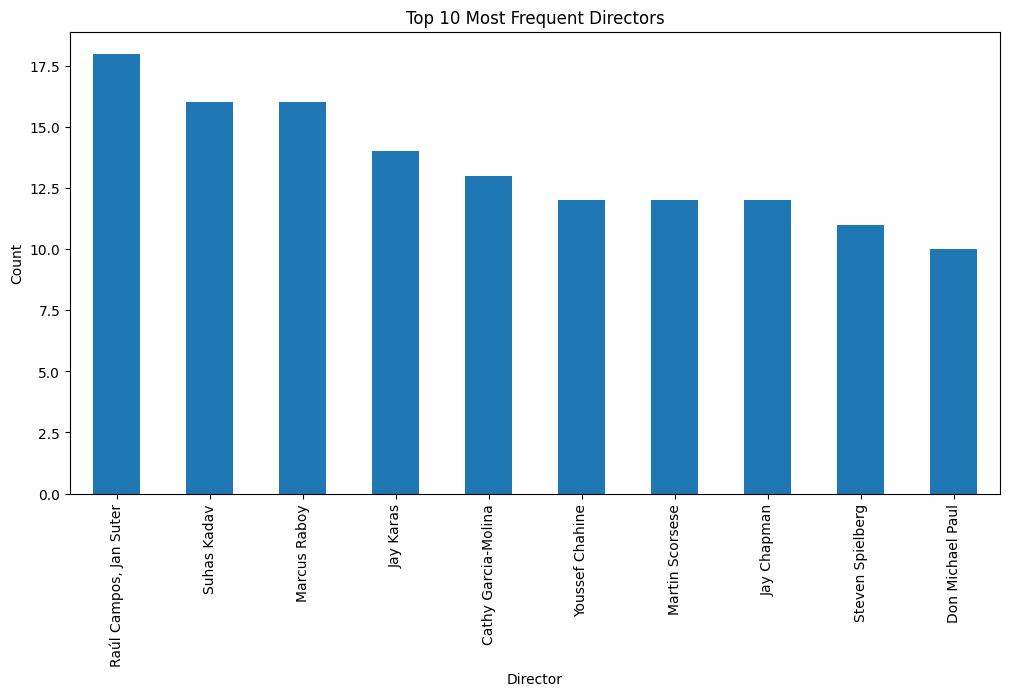

In [11]:
plt.figure(figsize=(12, 6))

# Exclude 'Rajiv Chilaka' from director counts
filtered_directors = data[data['director'] != 'Rajiv Chilaka']['director'].value_counts().head(10)

filtered_directors.plot(kind='bar')
plt.title("Top 10 Most Frequent Directors") # (Excluding Rajiv Chilaka)
plt.xlabel("Director")
plt.ylabel("Count")
plt.show()


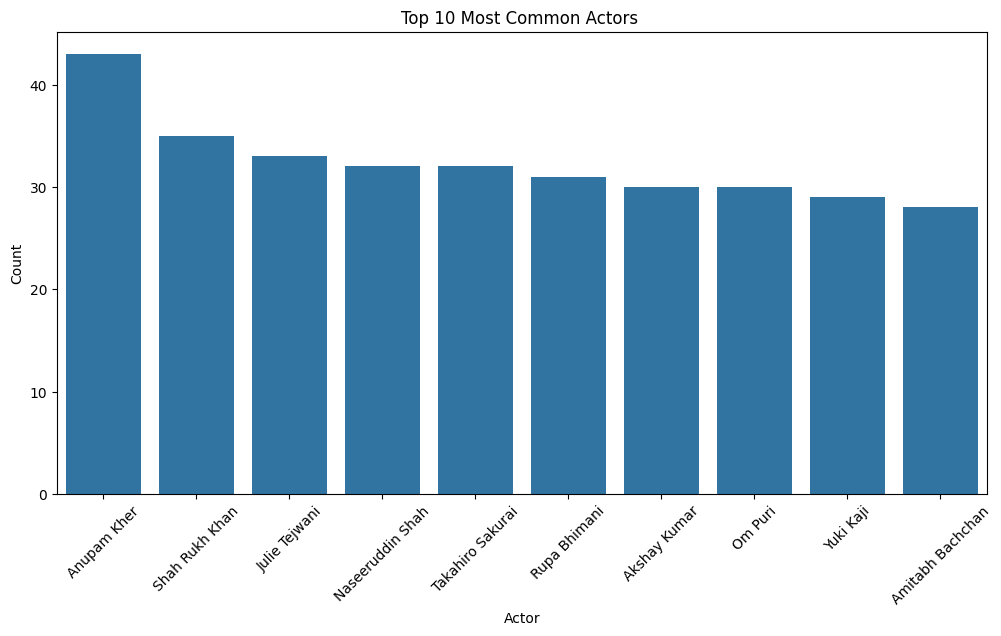

In [12]:
actors = [actor.strip() for sublist in data['cast'].dropna().str.split(',') for actor in sublist if actor.strip() != 'David Attenborough']

# Count occurrences
actor_counts = Counter(actors)

# Get top 10 actors
top_actors = actor_counts.most_common(10)

# Extract names and counts
actor_names, actor_freqs = zip(*top_actors)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=list(actor_names), y=list(actor_freqs))
plt.xticks(rotation=45)
plt.title("Top 10 Most Common Actors ") # (Excluding David Attenborough)
plt.xlabel("Actor")
plt.ylabel("Count")
plt.show()


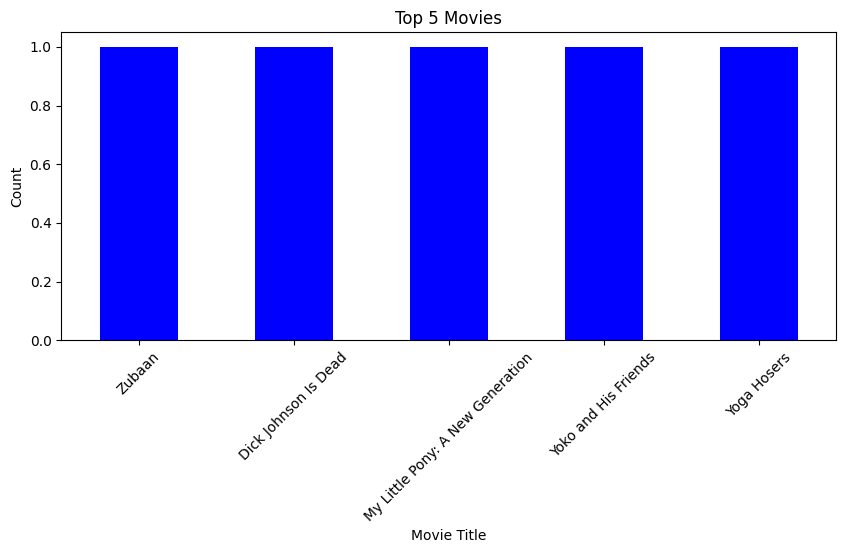

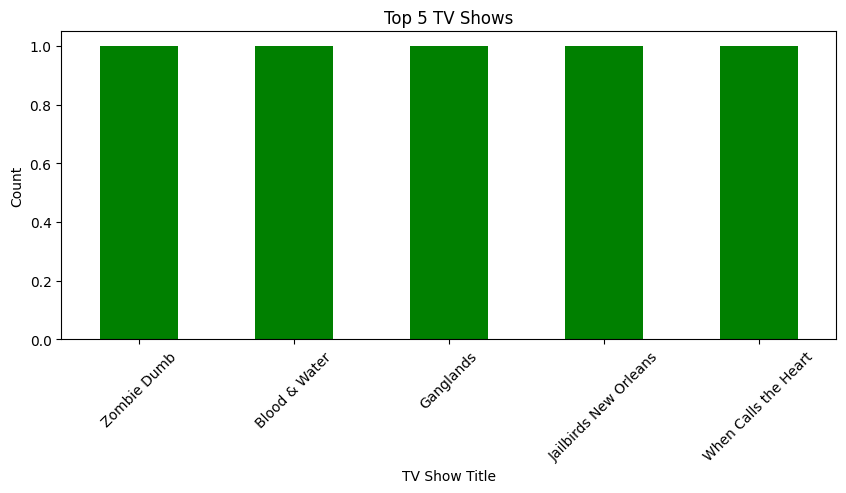

In [13]:
# Top 5 Movies
top_movies = data[data['type'] == 'Movie']['title'].value_counts().head(5)

# Top 5 TV Shows
top_tv_shows = data[data['type'] == 'TV Show']['title'].value_counts().head(5)


# Plot Movies
plt.figure(figsize=(10, 4))
top_movies.plot(kind='bar', color='blue')
plt.title("Top 5 Movies")
plt.xlabel("Movie Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot TV Shows
plt.figure(figsize=(10, 4))
top_tv_shows.plot(kind='bar', color='green')
plt.title("Top 5 TV Shows")
plt.xlabel("TV Show Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


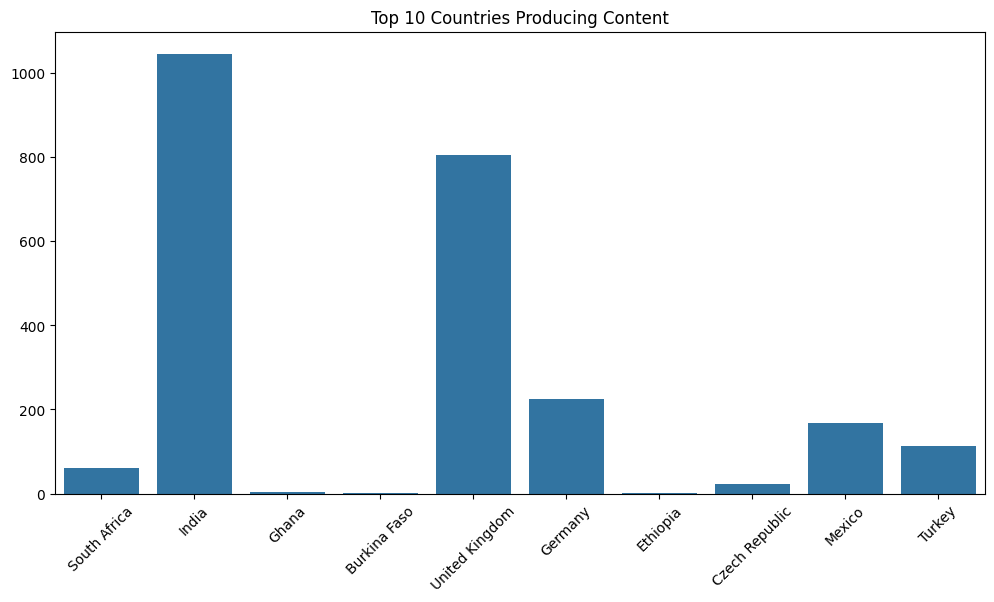

In [14]:
countries = [country.strip() for sublist in data['country'].dropna().str.split(',') for country in sublist if country.strip() != 'United States']
country_counts = Counter(countries)

plt.figure(figsize=(12,6))
sns.barplot(x=list(country_counts.keys())[:10], y=list(country_counts.values())[:10]) # (Excluding United States )
plt.xticks(rotation=45)
plt.title("Top 10 Countries Producing Content")
plt.show()